### Import libraries and load data

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
import warnings
warnings.filterwarnings('ignore')

## Reading data

In [13]:
train = pd.read_csv('train.csv')  
test = pd.read_csv('test.csv')

## Exploratory Data Analysis (EDA)

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


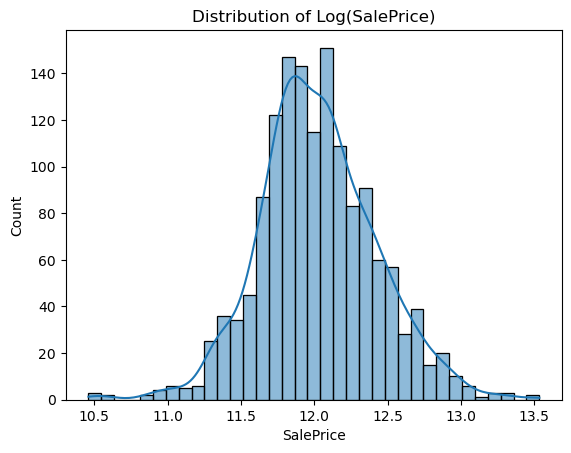

In [3]:
print(train['SalePrice'].describe())
sns.histplot(np.log1p(train['SalePrice']), kde=True)
plt.title("Distribution of Log(SalePrice)")
plt.show()

### Relationship of some features to price

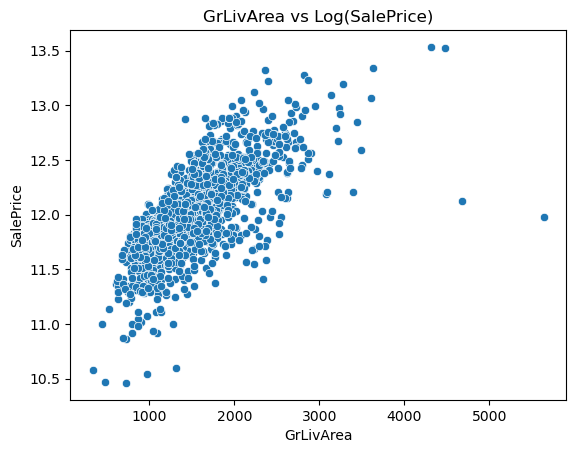

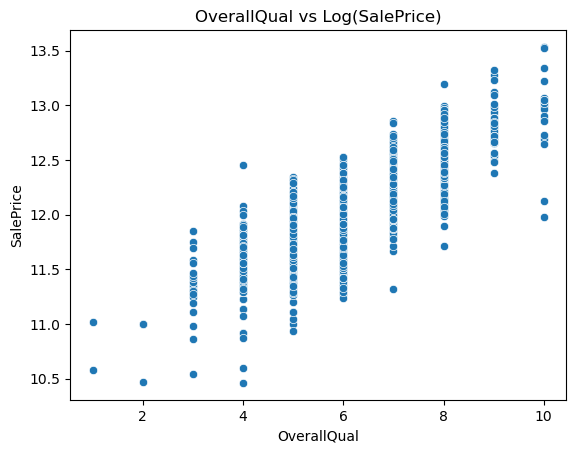

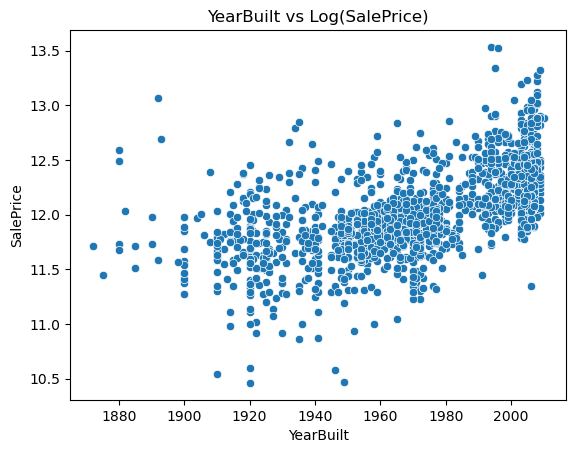

In [4]:
for col in ['GrLivArea','OverallQual','YearBuilt']:
    sns.scatterplot(x=train[col], y=np.log1p(train['SalePrice']))
    plt.title(f"{col} vs Log(SalePrice)")
    plt.show()

📌 Explanation:

▪ We examine the distribution of the target (price). Often, the data has a skewed gap, so we transform it with a log1p to improve forecasting.

▪ We visually examine the impact of some important features on the price.

## Data Processing – Cleaning and Transformation

In [5]:
all_data = pd.concat([train.drop('SalePrice',axis=1), test], ignore_index=True)

Unify data sources to implement common processing

In [16]:
for col in all_data.select_dtypes(include=[np.number]).columns:
    all_data[col].fillna(all_data[col].mean(), inplace=True)

Fill empty values ​​of numeric features with column average

In [7]:
all_data = pd.get_dummies(all_data, dummy_na=True)

📌 Explanation:

▪ We combined the data to create a unified processing.
▪ We filled in missing values ​​for numeric features.
▪ We applied "One-Hot" encryption to the categories... and filled in the missing values ​​with "None."

## Data segmentation and model preparation

In [8]:
n_train = train.shape[0]
X = all_data[:n_train]
X_test = all_data[n_train:]
y = np.log1p(train['SalePrice'])

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


## Training and evaluating a Random Forest model

In [17]:
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [11]:
y_pred = model.predict(X_val)
rmsle = np.sqrt(mean_squared_log_error(np.expm1(y_pred), np.expm1(y_val)))
print(f"RMSLE: {rmsle:.4f}")

RMSLE: 0.1475


📌 Explanation:

▪ We chose Random Forest as a strong starting point for numerical problems.

▪ We used RMSLE as a benchmark because it measures relative error in logarithms.

### Improved performance and K-Fold experience

In [18]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_log_error', cv=kf)
print("RMSLE K-Fold:", np.sqrt(-scores).mean().round(4))

RMSLE K-Fold: 0.0112


📌 Explanation:

▪We use K-Fold slicing to reliably estimate model performance outside of local data.